In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [7]:
def decode_audio(audio_binary):
  audio, _ = tf.audio.decode_wav(audio_binary,  desired_samples=264256)
  return tf.squeeze(audio, axis=-1)

def get_spectrogram(waveform):
  # Padding for files with less than 16000 samples
  zero_padding = tf.zeros([128000] - tf.shape(waveform), dtype=tf.float32)

  # Concatenate audio with padding so that all audio clips will be of the
  # same length
  waveform = tf.cast(waveform, tf.float32)
  equal_length = tf.concat([waveform, zero_padding], 0)
  spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)

  spectrogram = tf.abs(spectrogram)

  return spectrogram

def flat(spectrogram):
    return tf.expand_dims(spectrogram, -1)

In [8]:
file = ["/home/andrea/Scrivania/audio_only.wav", "/home/andrea/Scrivania/MIVIA_ROAD_DB1/splitted_dataset/66.wav"]
test_audio = tf.data.Dataset.from_tensor_slices(file)
io_audio = test_audio.map(tf.io.read_file, num_parallel_calls=-1)
waveform = io_audio.map(decode_audio, num_parallel_calls=-1)
spectrogram = waveform.map(get_spectrogram, num_parallel_calls=-1)
spectrogram = spectrogram.map(flat, num_parallel_calls=-1)

PLOT WAVEFORMS

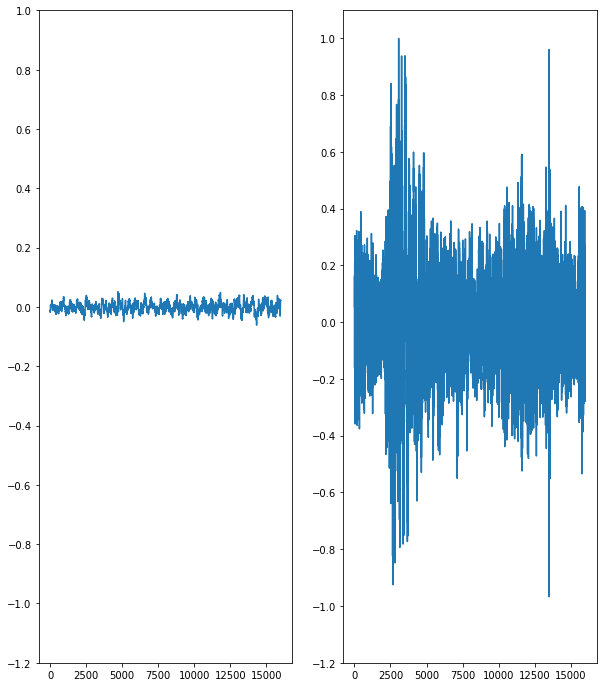

In [4]:
rows = 1
cols = 2
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, audio in enumerate(waveform.take(n)):
  r = 1
  c = i
  ax = axes[c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))


plt.show()

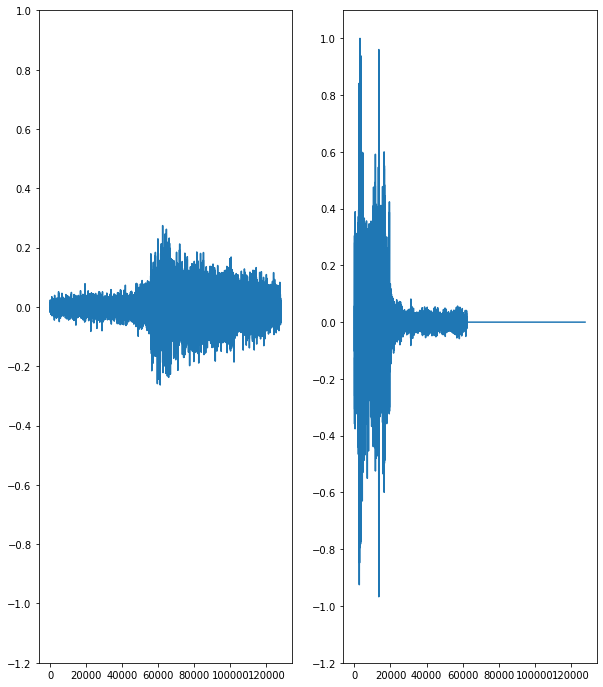

In [9]:
rows = 1
cols = 2
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, audio in enumerate(waveform.take(n)):
  r = 1
  c = i
  ax = axes[c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))


plt.show()

PLOT SPECTROGRAMS

/home/andrea/Scrivania/RC_Carta/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':
/home/andrea/Scrivania/RC_Carta/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


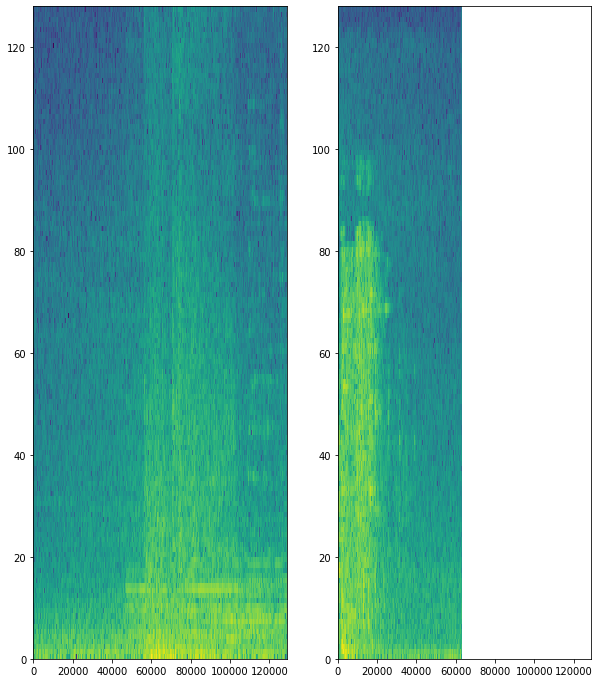

In [16]:
def plot_spectrogram(spectrogram, ax):
  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns).
  log_spec = np.log(spectrogram.T)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

rows = 1
cols = 2
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, audio in enumerate(waveform.take(n)):
  r = 1
  c = i
  ax = axes[c]
  np_audio = audio.numpy()
  sp = get_spectrogram(np_audio)
  plot_spectrogram(sp.numpy(), ax)